<a href="https://colab.research.google.com/github/yeon971105/Tesla_Stock/blob/main/CS171(Tesla_Stock).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tsla_data = pd.read_csv('/content/TSLA 2.csv')

In [ ]:
tsla_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# Calculate daily price change and daily return
tsla_data['Price Change'] = tsla_data['Close'] - tsla_data['Open']
tsla_data['Daily Return'] = tsla_data['Close'].pct_change()

In [ ]:
tsla_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Daily Return
0,2015-01-12,13.536667,13.631333,13.283333,13.480667,13.480667,89254500,-0.056000,NaN
1,2015-01-13,13.554667,13.840667,13.394000,13.616667,13.616667,67159500,0.062000,0.010089
2,2015-01-14,12.388667,13.013333,12.333333,12.846000,12.846000,173278500,0.457333,-0.056597
3,2015-01-15,12.966000,13.050000,12.666667,12.791333,12.791333,78247500,-0.174667,-0.004256
4,2015-01-16,12.713333,12.966000,12.643333,12.871333,12.871333,54048000,0.158000,0.006254


In [ ]:
# Calculate moving averages (7-day and 30-day)
tsla_data['7-Day MA'] = tsla_data['Close'].rolling(window=7).mean()
tsla_data['30-Day MA'] = tsla_data['Close'].rolling(window=30).mean()

In [ ]:
# Calculate MACD
exp1 = tsla_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = tsla_data['Close'].ewm(span=26, adjust=False).mean()
tsla_data['MACD'] = exp1 - exp2
tsla_data['MACD Signal'] = tsla_data['MACD'].ewm(span=9, adjust=False).mean()

In [ ]:
tsla_data.dropna(inplace=True)


In [ ]:
tsla_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Daily Return,7-Day MA,30-Day MA,MACD,MACD Signal
29,2015-02-24,13.819333,13.819333,13.446667,13.607333,13.607333,99054000,-0.212000,-0.015578,13.836667,13.743778,0.070642,0.127248
30,2015-02-25,13.662667,13.809333,13.505333,13.584000,13.584000,58642500,-0.078667,-0.001715,13.836571,13.747222,0.038374,0.109473
31,2015-02-26,13.600000,14.072667,13.481333,13.812667,13.812667,97093500,0.212667,0.016834,13.863619,13.753756,0.030896,0.093758
32,2015-02-27,13.793333,13.903333,13.520000,13.556000,13.556000,58231500,-0.237333,-0.018582,13.852952,13.777422,0.004211,0.075849
33,2015-03-02,13.513333,13.556000,13.055333,13.155333,13.155333,118831500,-0.358000,-0.029556,13.716000,13.789556,-0.048706,0.050938


In [ ]:
# Define the target variable: 1 if price goes up, 0 if it goes down
tsla_data['Up'] = (tsla_data['Close'].shift(-1) > tsla_data['Close']).astype(int)

In [ ]:
# Drop the last row as it doesn't have a target value
tsla_data = tsla_data[:-1]


In [ ]:
# Select features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price Change', 'Daily Return',
            '7-Day MA', '30-Day MA', 'MACD', 'MACD Signal']
X = tsla_data[features]
y = tsla_data['Up']

In [ ]:
X, y

(            Open        High         Low       Close     Volume  Price Change  \
 29     13.819333   13.819333   13.446667   13.607333   99054000     -0.212000   
 30     13.662667   13.809333   13.505333   13.584000   58642500     -0.078667   
 31     13.600000   14.072667   13.481333   13.812667   97093500      0.212667   
 32     13.793333   13.903333   13.520000   13.556000   58231500     -0.237333   
 33     13.513333   13.556000   13.055333   13.155333  118831500     -0.358000   
 ...          ...         ...         ...         ...        ...           ...   
 2366  174.600006  179.729996  172.729996  177.940002   69887000      3.339996   
 2367  176.130005  179.350006  175.580002  177.479996   56244900      1.349991   
 2368  176.059998  178.570007  173.169998  173.789993   50869700     -2.270005   
 2369  173.919998  174.750000  167.410004  170.660004   64761900     -3.259994   
 2370  171.119995  180.550003  169.800003  177.289993   89884800      6.169998   
 
       Daily R

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ensure the 'Date' column's data is of the date type so that it shows up properly in the graph
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])

print("\nData type of 'Date' column:")
print(tsla_data['Date'].dtype)

tsla_data.set_index('Date', inplace=True)


Data type of 'Date' column:
datetime64[ns]


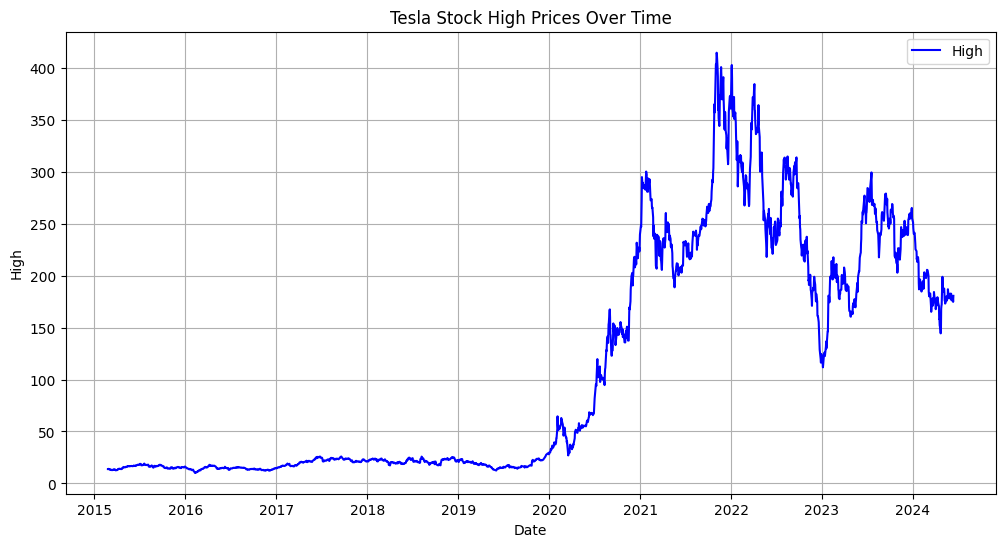

In [ ]:
import matplotlib.pyplot as plt

# Generate graph of TSLA highs over time
plt.figure(figsize=(12, 6))
plt.plot(tsla_data.index, tsla_data['High'], label='High', color='blue')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Tesla Stock High Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

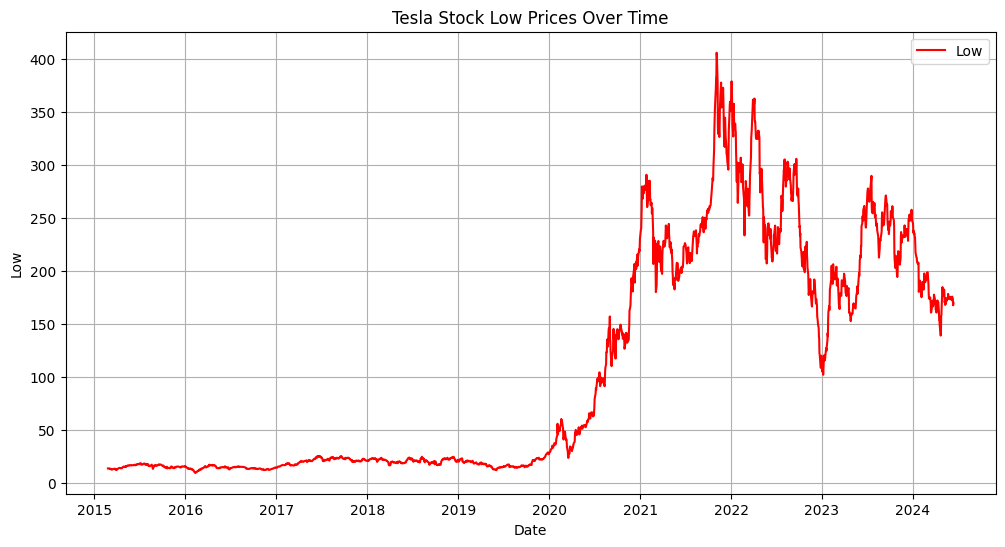

In [ ]:
# Generate graph of TSLA lows over time
plt.figure(figsize=(12, 6))
plt.plot(tsla_data.index, tsla_data['Low'], label='Low', color='red')
plt.xlabel('Date')
plt.ylabel('Low')
plt.title('Tesla Stock Low Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

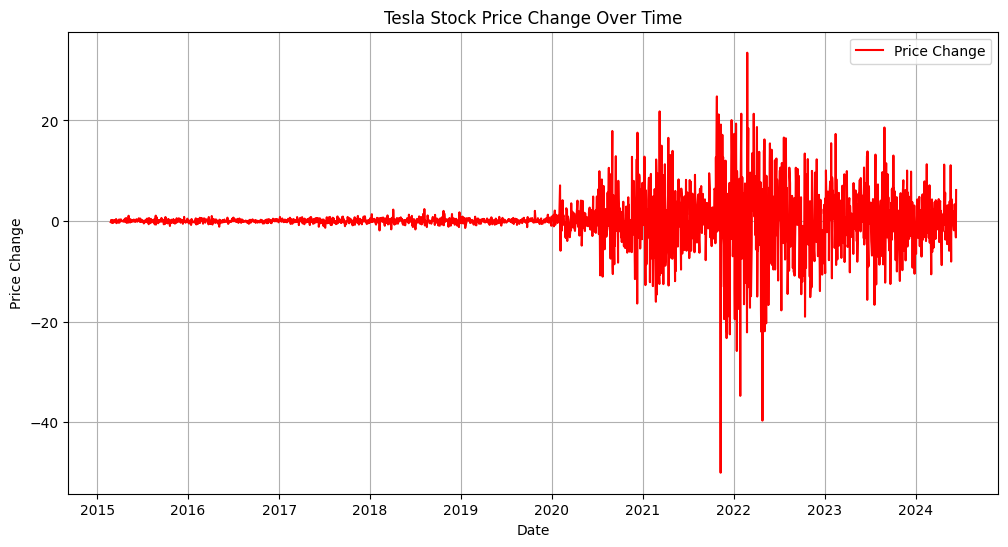

In [ ]:
# Generate graph of TSLA daily price changes over time
plt.figure(figsize=(12, 6))
plt.plot(tsla_data.index, tsla_data['Price Change'], label='Price Change', color='red')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Tesla Stock Price Change Over Time')
plt.legend()
plt.grid(True)
plt.show()

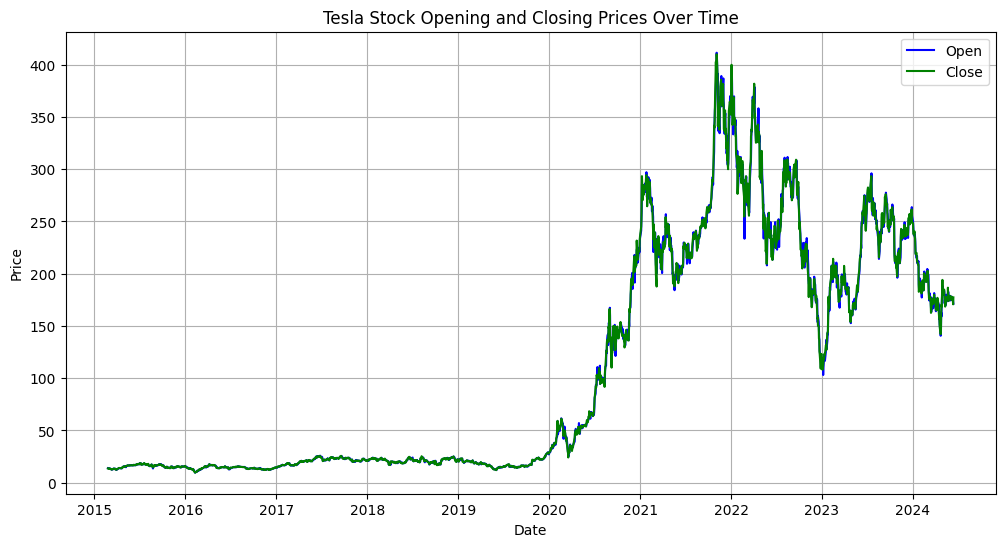

In [ ]:
# Generate a graph that compares the daily opening and closing prices for TSLA stock over time
plt.figure(figsize=(12, 6))
plt.plot(tsla_data.index, tsla_data['Open'], label='Open', color='blue')
plt.plot(tsla_data.index, tsla_data['Close'], label='Close', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Opening and Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate the average High price for TSLA stock
average_high = tsla_data['High'].mean()
print(f"The average daily high price between 2015 and 2024: ${average_high:.2f}")

The average daily high price between 2015 and 2024: $110.56


In [ ]:
# Calculate the average Low price for TSLA stock
average_low = tsla_data['Low'].mean()
print(f"The average daily low price between 2015 and 2024: ${average_low:.2f}")

The average daily low price between 2015 and 2024: $105.66


In [ ]:
# Calculate the average Price Change for TSLA stock over time
average_pc = tsla_data['Price Change'].mean()
print(f"The average daily price change of TSLA stock between 2015 and 2024: ${average_pc:.2f}")

The average daily price change of TSLA stock between 2015 and 2024: $-0.04


In [ ]:
# Calculate the average closing price for TSLA stock in financial Quarter 1
q1_data = tsla_data[(tsla_data.index.month >= 1) & (tsla_data.index.month <= 3)]
average_close_q1 = q1_data['Close'].mean()
print(f"The average closing price in Q1 is: ${average_close_q1:.2f}")

The average closing price in Q1 is: $111.72


In [ ]:
# Calculate the average closing price for TSLA stock in financial Quarter 2
q2_data = tsla_data[(tsla_data.index.month >= 4) & (tsla_data.index.month <= 6)]
average_close_q2 = q2_data['Close'].mean()
print(f"The average closing price in Q1 is: ${average_close_q2:.2f}")

The average closing price in Q1 is: $98.53


In [ ]:
# Calculate the average closing price for TSLA stock in financial Quarter 3
q3_data = tsla_data[(tsla_data.index.month >= 7) & (tsla_data.index.month <= 9)]
average_close_q3 = q3_data['Close'].mean()
print(f"The average closing price in Q1 is: ${average_close_q3:.2f}")

The average closing price in Q1 is: $109.00


In [ ]:
# Calculate the average closing price for TSLA stock in financial Quarter 4
q4_data = tsla_data[(tsla_data.index.month >= 10) & (tsla_data.index.month <= 12)]
average_close_q4 = q4_data['Close'].mean()
print(f"The average closing price in Q1 is: ${average_close_q4:.2f}")

The average closing price in Q1 is: $114.16


In [ ]:
print(f"Here are the averages for all the financial quarters' closing prices over the years 2015 - 2024 for TSLA stock:\n${average_close_q1:.2f}\n${average_close_q2:.2f}\n${average_close_q3:.2f}\n${average_close_q4:.2f}\n")
print("According to our calculations, the TSLA stock has historically performed best in Q4, and the worst in Q2.\nOverall, however, there is not much deviation going into quarters with lower averages for this stock, which means the stock will still hold a fair\namount of value in those months.\nWe recommend looking to buy TSLA stock in Q2 or Q3 in order to get great returns on it in Q4 and into Q1 of the next year.")

Here are the averages for all the financial quarters' closing prices over the years 2015 - 2024 for TSLA stock:
$111.72
$98.53
$109.00
$114.16

According to our calculations, the TSLA stock has historically performed best in Q4, and the worst in Q2.
Overall, however, there is not much deviation going into quarters with lower averages for this stock, which means the stock will still hold a fair
amount of value in those months.
We recommend looking to buy TSLA stock in Q2 or Q3 in order to get great returns on it in Q4 and into Q1 of the next year.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Prediction and Evaluation

# Define the target variable: 1 if price goes up, 0 if it goes down
tsla_data['Up'] = (tsla_data['Close'].shift(-1) > tsla_data['Close']).astype(int)

# Drop the last row as it doesn't have a target value
tsla_data = tsla_data[:-1]


In [ ]:
# Select features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price Change', 'Daily Return',
            '7-Day MA', '30-Day MA', 'MACD', 'MACD Signal']
X = tsla_data[features]
y = tsla_data['Up']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5053304904051172
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.47       230
           1       0.51      0.56      0.53       239

    accuracy                           0.51       469
   macro avg       0.50      0.50      0.50       469
weighted avg       0.50      0.51      0.50       469



In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Logistic Regression Classification Report:\n{classification_rep_lr}")


Logistic Regression Accuracy: 0.509594882729211
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.51      1.00      0.68       239

    accuracy                           0.51       469
   macro avg       0.25      0.50      0.34       469
weighted avg       0.26      0.51      0.34       469



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

# Train a Support Vector Machine model
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print(f"Support Vector Machine Accuracy: {accuracy_svm}")
print(f"Support Vector Machine Classification Report:\n{classification_rep_svm}")


Support Vector Machine Accuracy: 0.4989339019189765
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.50      0.98      0.67       239

    accuracy                           0.50       469
   macro avg       0.25      0.49      0.33       469
weighted avg       0.26      0.50      0.34       469



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
classification_rep_gbm = classification_report(y_test, y_pred_gbm)

print(f"Gradient Boosting Accuracy: {accuracy_gbm}")
print(f"Gradient Boosting Classification Report:\n{classification_rep_gbm}")


Gradient Boosting Accuracy: 0.4541577825159915
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.42      0.43       230
           1       0.47      0.49      0.48       239

    accuracy                           0.45       469
   macro avg       0.45      0.45      0.45       469
weighted avg       0.45      0.45      0.45       469



In [ ]:
from sklearn.neural_network import MLPClassifier

# Train a Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

print(f"Neural Network Accuracy: {accuracy_mlp}")
print(f"Neural Network Classification Report:\n{classification_rep_mlp}")


Neural Network Accuracy: 0.509594882729211
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.51      1.00      0.68       239

    accuracy                           0.51       469
   macro avg       0.25      0.50      0.34       469
weighted avg       0.26      0.51      0.34       469



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
